In [1]:
import pandas as pd 

In [2]:
main = pd.read_csv("../data/FinalDataset/malicious_phish.csv")
main

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


# Merging Data

In [4]:
import pandas as pd

# Define a list of file paths and corresponding types
file_paths = [
    ("../data/FinalDataset/URL/Benign_list_big_final.csv", "benign"),
    ("../data/FinalDataset/URL/DefacementSitesURLFiltered.csv", "defacement"),
    ("../data/FinalDataset/URL/Malware_dataset.csv", "malware"),
    ("../data/FinalDataset/URL/phishing_dataset.csv", "phishing"),
    ("../data/FinalDataset/URL/spam_dataset.csv", "spam")
]

# Initialize an empty list to store dataframes
dfs = []

# Iterate through the file paths and types
for file_path, url_type in file_paths:
    # Read the CSV file
    df = pd.read_csv(file_path, header=None)
    # Assign column names
    df.columns = ["url"]
    # Add a column for the URL type
    df["type"] = url_type
    # Append the dataframe to the list
    dfs.append(df)

dfs.append(main)
# Concatenate the list of dataframes into a single dataframe
merged_df = pd.concat(dfs, ignore_index=True)
merged_df.drop_duplicates(inplace=True)
merged_df.reset_index(drop=True, inplace=True)

# Display the merged dataframe
merged_df.head(100000)

,url,type
0,http://1337x.to/torrent/1048648/American-Snipe...,benign
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,benign
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,benign
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,benign
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,benign
...,...,...
99995,http://www.ccent.com.au/index.php?view=article...,defacement
99996,http://www.ccent.com.au/index.php?option=com_c...,defacement
99997,http://www.ccent.com.au/index.php?option=com_m...,defacement
99998,http://www.ccent.com.au/index.php?view=article...,defacement


# Preprocessing Data

In [5]:
missing_values = merged_df.isnull().sum()
print(missing_values)

url     0
type    0
dtype: int64


In [6]:
merged_df.drop_duplicates(subset=['url'], inplace=True)
merged_df

,url,type
0,http://1337x.to/torrent/1048648/American-Snipe...,benign
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,benign
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,benign
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,benign
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,benign
...,...,...
653041,xbox360.ign.com/objects/850/850402.html,phishing
653042,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
653043,www.gamespot.com/xbox360/action/deadspace/,phishing
653044,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
merged_df['type_encoded'] = label_encoder.fit_transform(merged_df['type'])
merged_df

,url,type,type_encoded
0,http://1337x.to/torrent/1048648/American-Snipe...,benign,0
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,benign,0
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,benign,0
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,benign,0
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,benign,0
...,...,...,...
653041,xbox360.ign.com/objects/850/850402.html,phishing,3
653042,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,3
653043,www.gamespot.com/xbox360/action/deadspace/,phishing,3
653044,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,3


# Balancing Data

In [8]:
type_counts = merged_df['type_encoded'].value_counts()
print(type_counts)

type_encoded
0    428080
1     95308
3     94086
2     23645
4     11921
Name: count, dtype: int64


In [9]:
from sklearn.utils import resample

# Separate the majority and minority classes
df_majority = merged_df[merged_df['type_encoded'] == 0]
df_minority_1 = merged_df[merged_df['type_encoded'] == 1]
df_minority_2 = merged_df[merged_df['type_encoded'] == 2]
df_minority_3 = merged_df[merged_df['type_encoded'] == 3]
df_minority_4 = merged_df[merged_df['type_encoded'] == 4]

# Randomly undersample the majority class to match the second largest class (95,308)
df_majority_downsampled = df_majority.sample(n=95308, random_state=42)

# Combine the downsampled majority class with the minority classes
balanced_df = pd.concat([df_majority_downsampled, df_minority_1, df_minority_2, df_minority_3, df_minority_4])

# Shuffle the dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Print new class distribution
print(balanced_df['type_encoded'].value_counts())

type_encoded
0    95308
1    95308
3    94086
2    23645
4    11921
Name: count, dtype: int64


In [10]:
from sklearn.utils import resample

# Oversample minority classes (Phishing & Spam)
df_minority_2_oversampled = resample(
    df_minority_2, replace=True, n_samples=94086, random_state=42
)
df_minority_4_oversampled = resample(
    df_minority_4, replace=True, n_samples=94086, random_state=42
)

# Combine all balanced classes
final_balanced_df = pd.concat([
    df_majority_downsampled,  # 95,308
    df_minority_1,            # 95,308
    df_minority_3,            # 94,086
    df_minority_2_oversampled, # 94,086 (oversampled)
    df_minority_4_oversampled  # 94,086 (oversampled)
])

# Shuffle the dataset
final_balanced_df = final_balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Print final class distribution
print(final_balanced_df['type_encoded'].value_counts())

type_encoded
1    95308
0    95308
2    94086
4    94086
3    94086
Name: count, dtype: int64


In [ ]:
final_balanced_df.to_csv("../data/final.csv")

# EDA

In [11]:
final_balanced_df.shape

(472874, 3)

In [12]:
final_balanced_df.isnull().sum()

url             0
type            0
type_encoded    0
dtype: int64

In [13]:
final_balanced_df.describe(include="all")

,url,type,type_encoded
count,472874,472874,472874.000000
unique,319830,5,NaN
top,http://archive.thisisyork.co.uk/2000/10/4/3117...,defacement,NaN
freq,22,95308,NaN
mean,NaN,NaN,1.992247
std,NaN,NaN,1.415107
min,NaN,NaN,0.000000
25%,NaN,NaN,1.000000
50%,NaN,NaN,2.000000
75%,NaN,NaN,3.000000


In [14]:
final_balanced_df["type_encoded"].value_counts()

type_encoded
1    95308
0    95308
2    94086
4    94086
3    94086
Name: count, dtype: int64

In [15]:
final_balanced_df.duplicated(subset=["url"]).sum()

153044

In [16]:
# Extract features from URLs
final_balanced_df["url_length"] = final_balanced_df["url"].apply(len)
final_balanced_df["num_special_chars"] = final_balanced_df["url"].apply(lambda x: sum(c in "!@#$%^&*()_+={}[]|\\:;\"'<>,.?/~`" for c in x))

# Display summary statistics
print(final_balanced_df[["url_length", "num_special_chars"]].describe())

          url_length  num_special_chars
count  472874.000000      472874.000000
mean       72.645975          10.209950
std        85.373792           7.668633
min         1.000000           0.000000
25%        34.000000           6.000000
50%        52.000000           9.000000
75%        86.000000          12.000000
max      2081.000000         371.000000


In [17]:
from urllib.parse import urlparse

final_balanced_df["domain"] = final_balanced_df["url"].apply(lambda x: urlparse(x).netloc)
final_balanced_df["domain"].value_counts().head(10)

domain
                                  161715
mitsui-jyuku.mixh.jp               11701
adservers.co.uk                     4819
amber.ch.ic.ac.uk                   4669
applerugs.co.uk                     4646
astore.amazon.co.uk                 4636
archive.salisburyjournal.co.uk      4620
apbfiber.com                        4587
archive.thisisyork.co.uk            4549
amazon.co.uk                        4511
Name: count, dtype: int64

In [18]:
final_balanced_df["subdomain_count"] = final_balanced_df["url"].apply(lambda x: len(urlparse(x).netloc.split(".")))
final_balanced_df["subdomain_count"].describe()

count    472874.000000
mean          2.465847
std           1.289675
min           1.000000
25%           1.000000
50%           3.000000
75%           3.000000
max          27.000000
Name: subdomain_count, dtype: float64

In [19]:
suspicious_keywords = ["login", "verify", "secure", "bank", "update", "account"]
final_balanced_df["suspicious_keyword_count"] = final_balanced_df["url"].apply(lambda x: sum(kw in x.lower() for kw in suspicious_keywords))
final_balanced_df["suspicious_keyword_count"].value_counts()

suspicious_keyword_count
0    456189
1     13671
2      2663
3       319
4        31
5         1
Name: count, dtype: int64

In [20]:
import numpy as np
final_balanced_df.select_dtypes(include=[np.number]).corr()

,type_encoded,url_length,num_special_chars,subdomain_count,suspicious_keyword_count
type_encoded,1.000000,0.161094,0.212391,0.415682,0.000757
url_length,0.161094,1.000000,0.466130,0.180619,0.082836
num_special_chars,0.212391,0.466130,1.000000,0.404468,0.092642
subdomain_count,0.415682,0.180619,0.404468,1.000000,0.021757
suspicious_keyword_count,0.000757,0.082836,0.092642,0.021757,1.000000


# Graphs

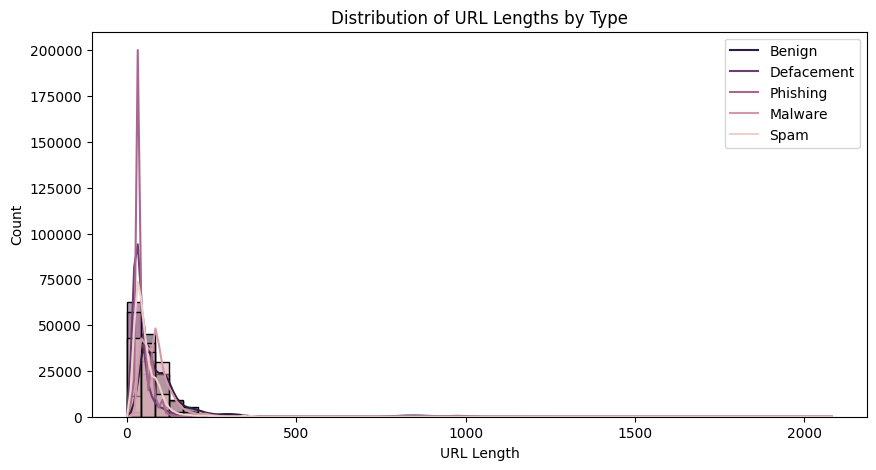

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(final_balanced_df, x="url_length", hue="type_encoded", bins=50, kde=True)
plt.xlabel("URL Length")
plt.ylabel("Count")
plt.title("Distribution of URL Lengths by Type")
plt.legend(["Benign", "Defacement", "Phishing", "Malware", "Spam"])
plt.show()

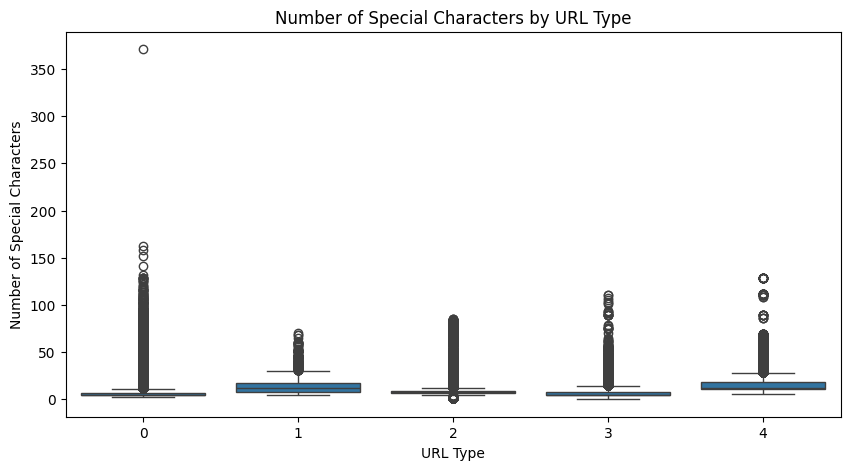

In [22]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="type_encoded", y="num_special_chars", data=final_balanced_df)
plt.xlabel("URL Type")
plt.ylabel("Number of Special Characters")
plt.title("Number of Special Characters by URL Type")
plt.show()

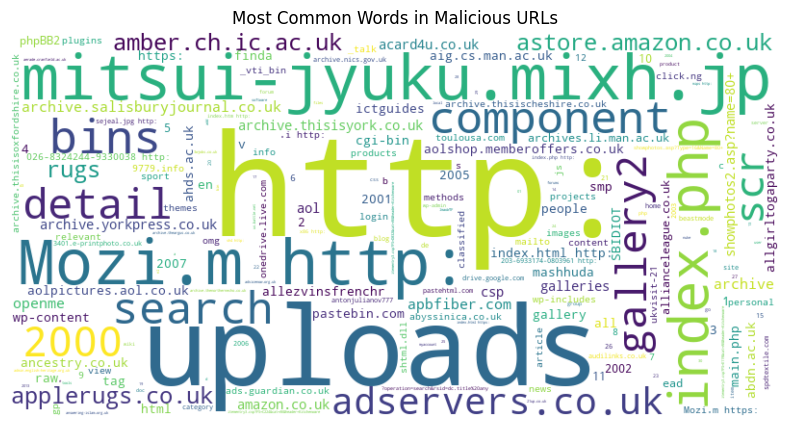

In [23]:
from collections import Counter
from wordcloud import WordCloud

# Get words from malicious URLs
malicious_urls = " ".join(final_balanced_df[final_balanced_df["type_encoded"] != 0]["url"])
word_counts = Counter(malicious_urls.split("/"))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Malicious URLs")
plt.show()

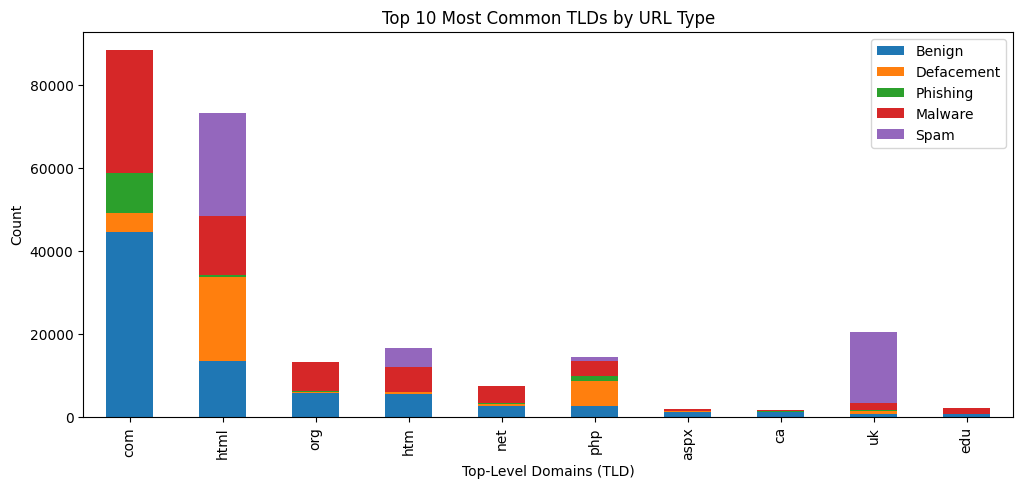

In [24]:
final_balanced_df["tld"] = final_balanced_df["url"].apply(lambda x: x.split(".")[-1].split("/")[0])

# Count TLD occurrences per category
tld_counts = final_balanced_df.groupby("type_encoded")["tld"].value_counts().unstack().fillna(0)

# Plot TLD distribution
tld_counts.T.nlargest(10, columns=[0, 1, 2, 3, 4]).plot(kind="bar", figsize=(12, 5), stacked=True)
plt.xlabel("Top-Level Domains (TLD)")
plt.ylabel("Count")
plt.title("Top 10 Most Common TLDs by URL Type")
plt.legend(["Benign", "Defacement", "Phishing", "Malware", "Spam"])
plt.show()

/var/folders/47/tg_r0vmx46l2t8x5kp4jy__r0000gn/T/ipykernel_36256/3262606182.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(char_counts.keys()), y=list(char_counts.values()), palette="pastel")


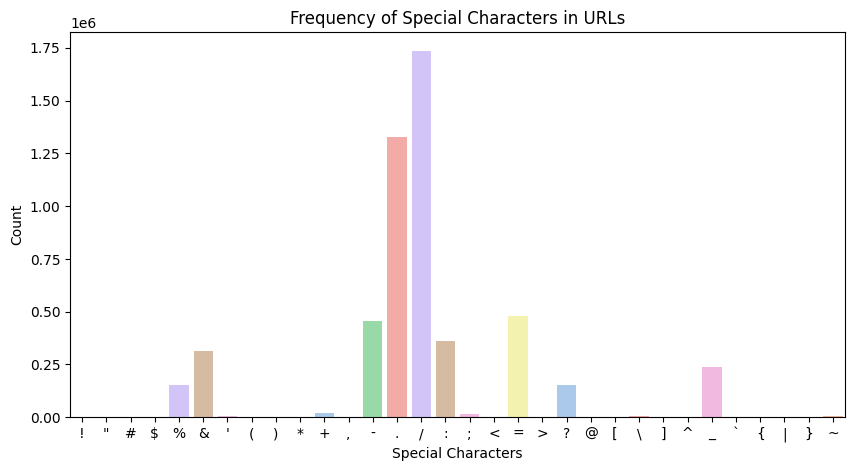

In [25]:
import string
import re

char_counts = {char: sum(final_balanced_df["url"].str.count(re.escape(char))) for char in string.punctuation}

plt.figure(figsize=(10, 5))
sns.barplot(x=list(char_counts.keys()), y=list(char_counts.values()), palette="pastel")
plt.xlabel("Special Characters")
plt.ylabel("Count")
plt.title("Frequency of Special Characters in URLs")
plt.show()

URL Length: Phishing and malware URLs tend to be longer.

Special Characters: "@", "=", and "%" are more frequent in malicious URLs.

Word Usage: Words like "secure, login, free" appear more in phishing/spam URLs.

Top-Level Domains: .xyz, .info, .tk, .top are more commonly seen in malicious URLs.